In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
df= pd.read_csv('dataset_train+test2.csv', sep=",")

In [3]:
df["weekend"].replace(np.nan, 0, inplace= True)

In [4]:
df = df[['Temperature', 'Light', 'CO2', 'Occupancy', ]]

In [5]:
df.head()

,Temperature,Light,CO2,Occupancy
0,23.18,426.0,721.25,1
1,23.15,429.5,714.00,1
2,23.15,426.0,713.50,1
3,23.15,426.0,708.25,1
4,23.10,426.0,704.50,1


In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [7]:
class_name = 'Occupancy'

In [8]:
import sys
sys.path.append('./')

In [9]:
from data_preparation import prepare_dataset

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [11]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [12]:
X_train.shape

(12526, 3)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9932948407524679
F1-score [0.9957477  0.98415493]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4235
           1       0.98      0.99      0.98      1134

    accuracy                           0.99      5369
   macro avg       0.99      0.99      0.99      5369
weighted avg       0.99      0.99      0.99      5369



In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(12526, 3)

In [16]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9932948407524679
F1-score [0.9957477  0.98415493]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4235
           1       0.98      0.99      0.98      1134

    accuracy                           0.99      5369
   macro avg       0.99      0.99      0.99      5369
weighted avg       0.99      0.99      0.99      5369



Univariate Feature Selection


In [17]:
from sklearn.feature_selection import SelectKBest

In [18]:
sel = SelectKBest(k=3)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(12526, 3)

In [19]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9932948407524679
F1-score [0.9957477  0.98415493]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4235
           1       0.98      0.99      0.98      1134

    accuracy                           0.99      5369
   macro avg       0.99      0.99      0.99      5369
weighted avg       0.99      0.99      0.99      5369



In [20]:
from sklearn.feature_selection import SelectFromModel

In [21]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(12526, 1)

In [22]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9888247345874465
F1-score [0.99291115 0.97361478]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4235
           1       0.97      0.98      0.97      1134

    accuracy                           0.99      5369
   macro avg       0.98      0.98      0.98      5369
weighted avg       0.99      0.99      0.99      5369



# Principal Component Analysis

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [25]:
X_train_pca.shape

(12526, 2)

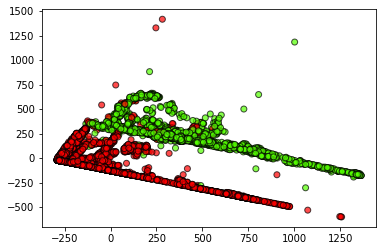

In [26]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [27]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9912460420934998
F1-score [0.99444379 0.97937692]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4235
           1       0.97      0.98      0.98      1134

    accuracy                           0.99      5369
   macro avg       0.99      0.99      0.99      5369
weighted avg       0.99      0.99      0.99      5369



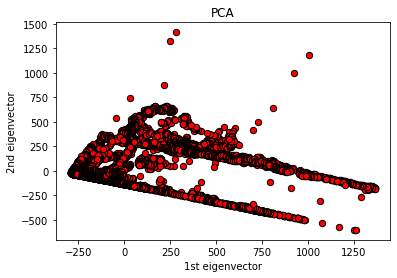

In [28]:

X_pca = PCA(n_components=2).fit_transform(df)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="red",cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

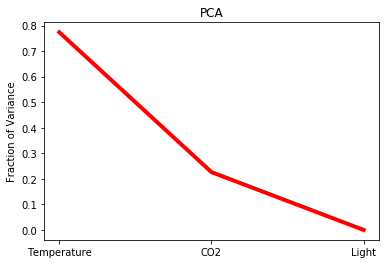

In [29]:
plt.plot(PCA(n_components=3).fit(df).explained_variance_ratio_, lw=4, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(3),["Temperature", "CO2","Light"])
plt.show()